In [20]:
import numpy as np
from sklearn.metrics import confusion_matrix
!pip install keras tensorflow scikit-learn


In [21]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np


In [22]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')
X_train /= 255
X_test /= 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [23]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [24]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_8 (Dense)             (None, 128)              

In [25]:
history = model.fit(X_train, y_train, epochs=30, batch_size=100, verbose=2, validation_data=(X_test, y_test))

Epoch 1/30
600/600 - 57s - loss: 0.1846 - accuracy: 0.9453 - val_loss: 0.0510 - val_accuracy: 0.9836 - 57s/epoch - 95ms/step
Epoch 2/30
600/600 - 41s - loss: 0.0515 - accuracy: 0.9844 - val_loss: 0.0372 - val_accuracy: 0.9877 - 41s/epoch - 68ms/step
Epoch 3/30
600/600 - 43s - loss: 0.0351 - accuracy: 0.9891 - val_loss: 0.0397 - val_accuracy: 0.9862 - 43s/epoch - 72ms/step
Epoch 4/30
600/600 - 41s - loss: 0.0269 - accuracy: 0.9916 - val_loss: 0.0291 - val_accuracy: 0.9901 - 41s/epoch - 69ms/step
Epoch 5/30
600/600 - 40s - loss: 0.0200 - accuracy: 0.9938 - val_loss: 0.0270 - val_accuracy: 0.9914 - 40s/epoch - 67ms/step
Epoch 6/30
600/600 - 40s - loss: 0.0169 - accuracy: 0.9945 - val_loss: 0.0259 - val_accuracy: 0.9914 - 40s/epoch - 67ms/step
Epoch 7/30
600/600 - 42s - loss: 0.0124 - accuracy: 0.9955 - val_loss: 0.0274 - val_accuracy: 0.9921 - 42s/epoch - 70ms/step
Epoch 8/30
600/600 - 39s - loss: 0.0100 - accuracy: 0.9970 - val_loss: 0.0331 - val_accuracy: 0.9906 - 39s/epoch - 66ms/step


In [26]:
scores = model.evaluate(X_test, y_test, verbose=0)
print(f'Acurácia: {scores[1] * 100:.2f}%')

Acurácia: 99.24%


In [27]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

313/313 [==============================] - 4s 11ms/step


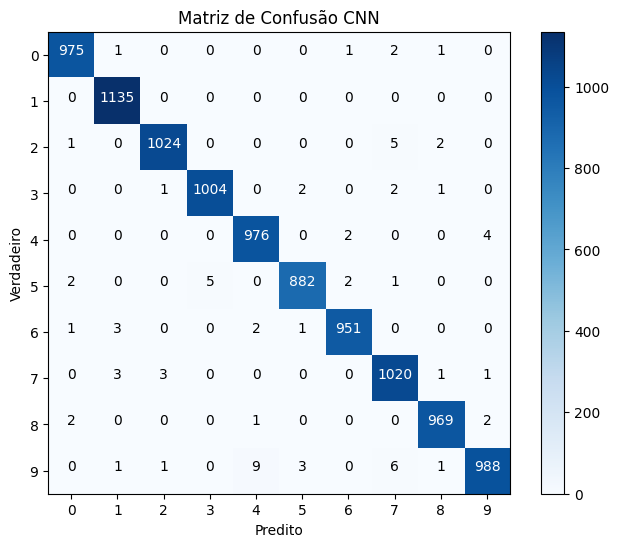

In [28]:
plt.figure(figsize=(8, 6))
plt.imshow(confusion_mtx, interpolation='nearest', cmap=plt.get_cmap('Blues'))
plt.title('Matriz de Confusão CNN')
plt.colorbar()
thresh = confusion_mtx.max() / 2.
for i in range(10):
    for j in range(10):
        color = 'white' if confusion_mtx[i, j] > thresh else 'black'
        plt.text(j, i, f'{confusion_mtx[i, j]}', horizontalalignment="center", color=color)
tick_marks = np.arange(10)
plt.xticks(tick_marks, range(10))
plt.yticks(tick_marks, range(10))
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.show()

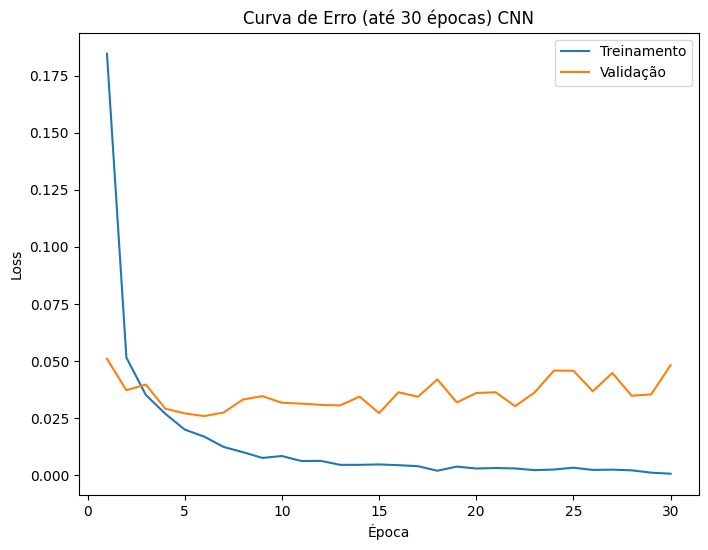

In [29]:
# Plotar a curva de erro
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 6))
plt.plot(range(1, 31), loss[:30], label='Treinamento')
plt.plot(range(1, 31), val_loss[:30], label='Validação')
plt.title('Curva de Erro (até 30 épocas) CNN')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.legend()
plt.show()

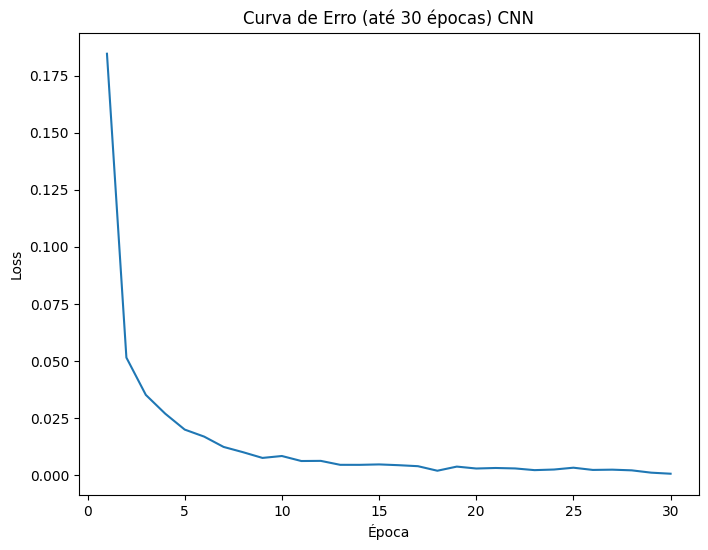

In [30]:


loss = history.history['loss']
plt.figure(figsize=(8, 6))
plt.plot(range(1, 31), loss[:30])
plt.title('Curva de Erro (até 30 épocas) CNN')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.show()